# TP Séparateurs à Vaste Marge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

X, y = load_breastcancer("wdbcM1B0.data")

### Question 2.1

Le problème (1) est le suivant :
$$ min_{v \in \mathbb{R}, a \in \mathbb{R}^{m}, \zeta \in \mathbb{R}^{n}} \frac{1}{2} \sum_{j=1}^{m} V_{j}^{2} + C\sum_{i=1}^{n} \zeta_{i} $$ 
Avec pour tout i$\in[\![1,n ]\!],$  on a 0$\leqslant\zeta_{i}$ et $1-y_{i}(x_{i}^{T}v+a)\leqslant\zeta_{i}$

On nomme A le minimum du problème (1).


Le problème (2) est le suivant : 
$$ min_{v \in \mathbb{R}, a \in \mathbb{R}^{m}} \frac{1}{2} \sum_{j=1}^{m} V_{j}^{2} + C\sum_{i=1}^{n} max(0,1-y_{i}(x_{i}^{T}v+a)) $$ 
On appelle B le minimum du problème (2).


En choisissant $\zeta$ tel que pour tout $i\in[\![1,n ]\!],\zeta_{i}=max(0,1-y_{i}(x_{i}^{T}v+a))$, on a A $\leqslant$ B, par définition de A et du minimum. 

De plus, pour tout i$\in[\![1,n ]\!],$  on a 0$\leqslant\zeta_{i}$ et $1-y_{i}(x_{i}^{T}v+a)\leqslant\zeta_{i}$. 
Donc pour tout i$\in[\![1,n ]\!],$  on a $max(0,1-y_{i}(x_{i}^{T}v+a)) \leqslant\zeta_{i}$.
On obtient bien B $\leqslant$ A.

Les deux problèmes sont donc équivalents, car leur solutions sont égales. L'optimum de l'un est égal à l'optimum de l'autre.

## Question 2.2

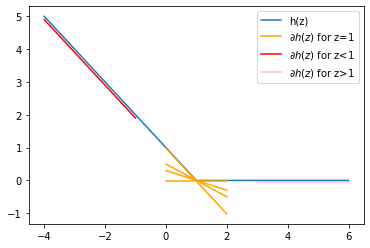

In [3]:
X_=np.linspace(-4,6,11)
Y_=[max(0,1-i)for i in range(-4,7)]
plt.plot(X_,Y_,label="h(z)")
plt.plot([0,2], [-0.02,-.02], color = 'orange', label = "$\partial h(z)$ for z=1")
plt.plot([0,2], [0.98, -1.02], color = 'orange')
plt.plot([0,2], [0.5, -.5], color = 'orange')
plt.plot([0,2], [0.3,-0.3], color = 'orange')
plt.plot([-4,-1],[4.9,1.9],color='red',label='$\partial h(z)$ for z<1')
plt.plot([3,6],[-0.05,-0.05],color='pink',label='$\partial h(z)$ for z>1')
plt.legend()
plt.show()

On observe graphiquement que le subgradient de h est égal à $[-1,0]$ si z=1.
Comme h est dérivable sauf en 1, $\frac{dh}{dz} (z) = \partial h(z)$. 

Ainsi si z<1, on a $\partial h(z)$={-1}.
Et pour z>1, on a $\partial h(z)$={0}.

## Question 2.3

On pose N(v,a)=$\frac{1}{2} \sum_{j=1}^{m} v_{j}^{2}$. 

N:$\mathbb{R}^{m+1}\mapsto\mathbb{R}$

Pour tout i$\in[\![1,m]\!],n_{j}(v_{j})=\frac{1}{2}v_{j}^{2}$, on a bien N(v,a)=$ \sum_{j=1}^{m} n_{j}(v_{j})$. 

N est donc séparable. 



On pose H:z$\mapsto \sum_{i=1}^{n} max(0,1-z_{i})$. 

H: $\mathbb{R}^{n}\mapsto\mathbb{R}$
          
Pour tout i$\in[\![1,m]\!],h_{j}(z_{i})=max(0,1-z_{i})$, on a bien H=$ \sum_{i=1}^{n} h_{i}(z_{i})$. 

Donc H est séparable. 


On pose M:v,a$\mapsto y_{i}(x_{i}^{T}v+a)$.

M:$\mathbb{R}^{m+1}\mapsto\mathbb{R}^{n}$

Soit l$\in \mathbb{R}$, v,w$\in \mathbb{R} ^{2}$. 
$M(v+l*w,a)=y_{i}(x_{i}^{T}(v+l*w)+a)=y_{i}(x_{i}^{T}v+a)+l*y_{i}(x_{i}^{T}w+a)=M(v,a)+l*M(w,a)$.

De même, M est linéaire selon a par linéarité du produit matriciel. 

Ainsi M est linéaire. 

Par définition de M,H et N : $$f(v,a)=N(v,a)+cH(M(v,a))$$

dom N = $\mathbb{R}^{m+1}$, dom H=$\mathbb{R}^{n}$, comme M est linéaire et 0 $\in$ dom H, 
on a  0$\in$ relint(dom H - $M^{T}$ dom N). H et N sont convexes . 

On peut donc appliquer la proposition 2.4.2 :
$$\partial f(v,a)=\partial(N(v,a)+H(M(v,a)))=\partial N(v,a)+cM^{T}\partial H(M(v,a))$$

$\partial N  (v,a)$ =  { $\triangledown N(v,a) $} = {$\begin{bmatrix} \frac{\partial N  (v,a)}{\partial v} \\ \frac{\partial N  (v,a)}{\partial a}\end{bmatrix}$}={$\begin{bmatrix} v \\ 0 \end{bmatrix}$} car N est differentiable selon chacune de ses composante ($v_{1},v_{2},...,v_{m},a)$).

$\partial H (Z) $={$\begin{bmatrix} -1 si Z_{i}<1  \\ [-1,0] si Z_{i}=1 \\ 0 sinon \end{bmatrix}$} car H est séparable, et d'après la question 2.2.

## Question 2.4

In [4]:

M = np.dot(np.diag(y), np.concatenate([X, np.ones((569,1))],axis=1))

def N(v,a):
    return np.sum(v**2)/2

def H(z):
    return np.sum(np.maximum(np.zeros(z.shape),1-z))

def f(v,a):
    c=1
    f=N(v,a) + c * H(np.dot(M,np.concatenate([v, [a]])))
    return f

def subgrad_N(v,a):
    return np.concatenate([v, [0]])

def subgrad_H(Z):
    return  (Z<=1)*(-1) #on choisit le subgradient -1 si z==1

def subgrad_f(v,a):
    c=1
    return subgrad_N(v,a) + c * np.dot(np.transpose(M),subgrad_H(np.dot(M,np.concatenate([v, [a]]))))

## Question 2.5

In [5]:
def methode_sous_gradient(v,a):
    X=np.concatenate([v, [a]])
    res= math.inf
    k=0
    while res>0.01 :
        gamma = 1/np.sqrt(k+1)
        Xmemory=X.copy()
        X = X - gamma*subgrad_f(X[:-1],X[-1]) 
        res=np.abs(f(Xmemory[:-1],Xmemory[-1])-f(X[:-1],X[-1]) )
        k+=1
    return X

In [6]:
v = np.zeros((30,))
a=0
print("Situation initiale : f(v0,a0)="+str(f(v,a)))
Xsol = methode_sous_gradient(v,a)
print("Situation finale après optimisation : f(v*,a*)="+str(f(Xsol[:-1],Xsol[-1])))

Situation initiale : f(v0,a0)=569.0
Situation finale après optimisation : f(v*,a*)=48.08520013665914


## Question 3.1

$E(f_I(v,a)) = \sum_i P(I = i) \times f_i(v,a)  = \frac{1}{n}\sum_i f_i(v,a) = \frac{1}{2} \sum_j v_j^2 + \frac{1}{n}\sum_i c\,n\,max(0,1-y_i(x_i^Tv + a))\\ E(f_I(v,a)) = \frac{1}{2} \sum_j v_j^2 + c\sum_i max(0,1-y_i(x_i^Tv + a))$

Donc $ E(f_I(v,a)) = f(v,a)$

## Question 3.2

On a $f_i(v,a)=\frac{1}{2} \sum_j v_j^2 + c\,n\,max(0,1-y_i(x_i^Tv + a))=N(v,a)+H(Mi(v,a)^T)$
En posant $M=y(x^T,1)$ et Mi la ième colone de M.

Ainsi : $$\partial f(v,a)=\partial(N(v,a)+H(Mi(v,a)))=\partial N(v,a)+cnMi^{T}\partial H(Mi(v,a))$$

$\partial f_i(v,a) = \left \{ \begin{array} {} \{(v,0) - ncM_i^T\} & if \, M_i(v,a) \lt 1 \\ \{(v,0) + ncM_i^T,\,t \in [-1;0]\} & if \, M_i(v,a) = 1 \\ \{(v,0)\} & if \, M_i(v,a) \gt 1 \\ \end{array} \right .$

## Question 3.3

In [7]:
n=len(M)

def subgrad_H_M_i(v,a, i):
    va=np.concatenate([v, [a]])
    return ((np.dot(M[i,:],va)>=1)- 1) * M[i,:]

def subgrad_f_i(v,a, i):
    va=np.concatenate([v, [a]])
    return subgrad_N(v,a) + c * M.shape[0] * subgrad_H_M_i(v,a,i)

def methode_sous_gradient_stochastique(v,a):
    X=np.concatenate([v, [a]])
    res= math.inf
    k=0
    X_moy = np.zeros(X.shape)
    gamma_sum = 0
    while res>0.001:
        I=np.random.randint(n)
        gamma = 1/np.sqrt(k+1)
        Xmemory=X.copy()
        X_moy+=X*gamma
        gamma_sum+=gamma
        X = X - gamma*subgrad_f_i(X[:-1],X[-1],I) 
        res=np.abs(f(Xmemory[:-1],Xmemory[-1])-f(X[:-1],X[-1]) )
        k+=1
    return X_moy/gamma_sum

In [8]:
v = np.zeros((30,))
c=1
print("Situation initiale : f(v0,a0)="+str(f(v,a)))
Xsol = methode_sous_gradient_stochastique(v,a)
print("Situation finale après optimisation avec gradient stochastique: f(v*,a*)="+str(f(Xsol[:-1],Xsol[-1])))

Situation initiale : f(v0,a0)=569.0
Situation finale après optimisation avec gradient stochastique: f(v*,a*)=275.5491334272896


Les résultats avec cette méthode d'optimisation sont très variables : entre 30 et 300. 

## Question 4.1

Le lagrangien du problème (1) s'écrit :
 $$L(v,a,\zeta,\phi)=\sum_{j=1}^{m} V_{j}^{2} + C\sum_{i=1}^{n} \zeta_{i}+\sum_{i=1}^{n} \phi_{i}(1-y_{i}(x_{i}^Tv+a)-\zeta_{i})-\sum_{i=1}^{n} \phi_{i}\zeta_{i}+\sum_{i=1}^{n} l_{\mathbb{R}^{+}}(\phi_{i})$$
 $$L(v,a,\zeta,\phi)=\sum_{j=1}^{m} V_{j}^{2} + C\sum_{i=1}^{n} \zeta_{i}+\sum_{i=1}^{n} \phi_{i}(1-y_{i}(x_{i}^Tv+a)-2\zeta_{i})+\sum_{i=1}^{n} l_{\mathbb{R}^{+}}(\phi_{i})$$

## Question 4.2

Considerons d'abord g comme une fonction de x pour tout $\phi$ :
$$\forall x>-\frac{\phi}{\rho}, g(x,\phi)=\frac{x^2 \rho}{2}+x\phi$$ 
Sa dérivée $\forall x>-\frac{\phi}{\rho}$ vaut $\nabla_{x}g(x,\phi)=\phi+x\rho>0$. Ce résultat tend vers 0 quand x tend vers $-\frac{\phi}{\rho}$.
Au contraire, $\forall x<-\frac{\phi}{\rho},g(x,\phi)=-\frac{\phi^{2}}{2\rho}$, donc $\nabla_{x}g(x,\phi)=0$.
Donc g est dérivable selon x sur R, et $\nabla_xg(x, \phi) = \left \{ \begin{array} {} 0 & if \, x \le - \frac{\phi}{\rho} \\ \rho x + \phi & if \, x \gt - \frac{\phi}{\rho} \\ \end{array} \right . = \rho \max (0, x+\frac{\phi}{\rho})$

On procède de même en considérant g comme une fonction de  $\phi$ pour tout x:  $\nabla_\phi g(x, \phi) = \left \{ \begin{array} {} -\frac{\phi}{\rho} & if \, \phi \le - x{\rho} \\ x & if \, \phi \gt - x{\rho} \\ \end{array} \right . =\max (-\frac{\phi}{\rho}, x)$

## Question 4.3

$\forall x \in \mathbb{R} \nabla_xg(x, \phi)>0$, donc g(.,$\phi$) est convexe.
De même, $\nabla_{\phi}g(x, \phi)$ est décroissante pour x fixé, ainsi, g(x,.) est concave.

## Question 4.4

In [ ]:
rho = 2

def f_bis(v,xi):
    return 1/2 * np.sum(v**2) + c * np.sum(xi)

def subgrad_g_x(x, phi):
    return rho*np.maximum(np.zeros(x.shape),x+phi/rho)

def subgrad_g_phi(x, phi):
    return np.maximum(-phi/rho,x)

def descente_grad_L(v0,a0,xi0,phi0,psi0):
    v = v0.copy()
    a = a0
    xi = xi0.copy()
    phi=phi0
    psi=psi0
    d_v = np.zeros((30,))
    d_a = 1.5
    d_xi = np.zeros((569,))
    while np.sum(d_v**2)+d_a**2+np.sum(d_xi**2)>1:
        gamma = 10**(-4)
        d_v =( v - np.dot(np.dot(np.diag(y), X).T, subgrad_g_x(1-xi-np.dot(np.diag(y), np.dot(X, v) + a), psi)))
        d_a=np.sum(np.dot(-np.diag(y),subgrad_g_x(1-xi-np.dot(np.diag(y), np.dot(X, v) + a),psi)))
        d_xi =(c - subgrad_g_x(-xi, phi) - subgrad_g_x(1-xi-np.dot(np.diag(y), np.dot(X, v) + a), psi))
        a-=d_a*gamma
        v-=d_v*gamma
        xi-=d_xi*gamma
    return v, a, xi

In [ ]:
v0 = np.zeros((30,))
a0 = 0
xi0 = np.zeros((569,))
phi0=np.ones((569,))
psi0=np.ones((569,))
print("Situation initiale : f(v0,a0)="+str(f_bis(v0,xi0)))
v,a,xi = descente_grad_L(v0,a0,xi0,phi0,psi0)
print("Situation finale après optimisation : f(v*,a*)="+str(f_bis(v,xi)))

Situation initiale : f(v0,a0)=0.0
Situation finale après optimisation : f(v*,a*)=33.157988097341516


## Question 4.5 

In [ ]:
def subgrad_L_phi(v,a,xi,phi,psi):
    return subgrad_g_phi(-xi, phi)

def subgrad_L_psi(v,a,xi,phi,psi):
    x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
    return subgrad_g_phi(1-xi-np.dot(np.diag(y), np.dot(X, v) + a), psi)

## Question 4.6

In [ ]:
def lagrangien_augmenté(N):
    phi = 0
    psi = 0
    v0 = np.zeros((30,))
    a0 = 0
    xi0 = np.zeros((569,))
    for i in range(N):
        v,a,xi =descente_grad_L(v0,a0,xi0,phi,psi)
        phi += rho * subgrad_g_phi(-xi, phi)
        psi += rho * subgrad_g_phi(1-xi-np.dot(np.diag(y), np.dot(X, v) + a), psi)
    return v,a,xi

In [ ]:
v,a,xi = lagrangien_augmenté(2000)
print("Situation finale après optimisation : f(v*,a*)="+str(f_bis(v,xi)))

## Question 5

La méthode du sous-gradient est plus efficace que celle du gradient stochastique. En effet la méthode du gradient stochastique renvoie des résultats très variables. Pour rendre cette méthode plus efficace il faurait augmenter grandement le nombre de données. 

La méthode du Lagrangien augmenté donne les meilleurs résultats mais est aussi très longue et demande beaucoup de calculs. 